In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

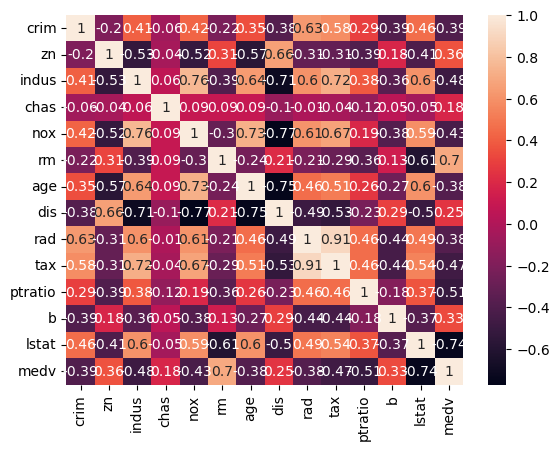

In [8]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

C:\Users\knvai\AppData\Local\Temp\ipykernel_21216\2233295577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'], bins=30)


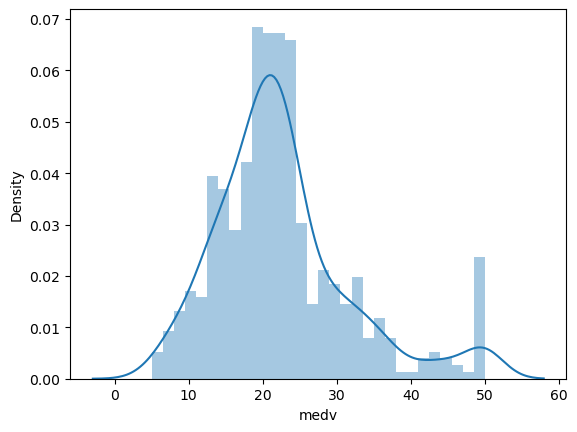

In [9]:
sns.distplot(df['medv'], bins=30)
plt.show()

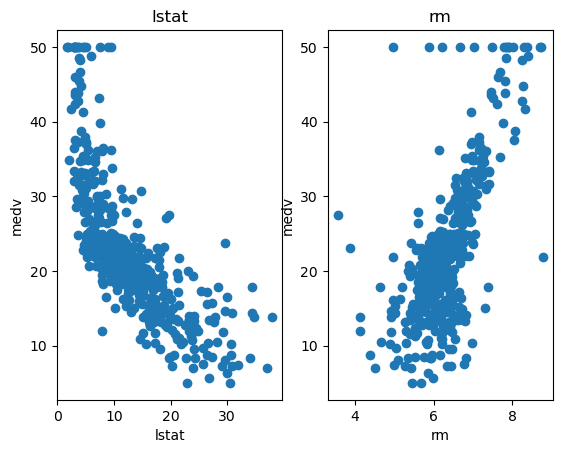

In [10]:
features= ['lstat', 'rm']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['medv']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [11]:
from sklearn.model_selection import train_test_split

x = df.loc[:,df.columns!='medv']
y = df.loc[:,df.columns=='medv']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train =mms.fit_transform(x_train)
x_test =mms.transform(x_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.05,verbose=1)

Epoch 1/100


11/11 [==============================] - 1s 29ms/step - loss: 579.8091 - mae: 22.3172 - val_loss: 538.0637 - val_mae: 21.2520
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 537.5554 - mae: 21.3154 - val_loss: 495.5900 - val_mae: 20.1525
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 485.1677 - mae: 19.9898 - val_loss: 432.6932 - val_mae: 18.3816
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 402.9789 - mae: 17.7178 - val_loss: 339.8580 - val_mae: 15.3250
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 291.6026 - mae: 14.2730 - val_loss: 234.1754 - val_mae: 11.1587
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 186.3193 - mae: 10.8532 - val_loss: 165.1979 - val_mae: 10.5492
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 130.0612 - mae: 8.7692 - val_loss: 154.2216 - val_mae: 10.4798
Epoch 8/100
11/11 [====================

11/11 [==============================] - 0s 8ms/step - loss: 21.8135 - mae: 3.1422 - val_loss: 11.0055 - val_mae: 2.4516
Epoch 59/100
11/11 [==============================] - 0s 6ms/step - loss: 21.2175 - mae: 3.0826 - val_loss: 10.2287 - val_mae: 2.3834
Epoch 60/100
11/11 [==============================] - 0s 9ms/step - loss: 21.1206 - mae: 3.0154 - val_loss: 9.6127 - val_mae: 2.2979
Epoch 61/100
11/11 [==============================] - 0s 8ms/step - loss: 21.3146 - mae: 3.1431 - val_loss: 10.3385 - val_mae: 2.3884
Epoch 62/100
11/11 [==============================] - 0s 7ms/step - loss: 20.8694 - mae: 3.0037 - val_loss: 9.9143 - val_mae: 2.3212
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 20.8647 - mae: 3.0844 - val_loss: 10.9198 - val_mae: 2.4787
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 20.7061 - mae: 2.9968 - val_loss: 10.2044 - val_mae: 2.3426
Epoch 65/100
11/11 [==============================] - 0s 5ms/step - loss: 20.

In [15]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

5/5 [==============================] - 0s 2ms/step - loss: 10.6717 - mae: 2.4742
MSE :  10.671661376953125
MAE :  2.474165678024292


In [16]:
y1 = model.predict(x_test[:])

5/5 [==============================] - 0s 2ms/step


In [17]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


In [18]:
ps=[]
for i in y1:
    ps.append(list(i)[0])

In [19]:
d = pd.DataFrame({'actual':y_test['medv'],'predicted':ps})

In [20]:
d

,actual,predicted
307,28.2,29.875149
343,23.9,26.236834
47,16.6,17.603271
67,22.0,20.944130
362,20.8,21.301014
...,...,...
467,19.1,15.658459
95,28.4,26.958626
122,20.5,19.502138
260,33.8,34.960060
